In [8]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [18]:
rcParams['figure.figsize'] = 15, 8

In [2]:
with open('data/marathon-mt-blanc-2018.json') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)

In [72]:
df = df.loc[df.race != '10km'].copy()

In [73]:
df['num_stages'] = [len(row.stages) - 1 for _, row in df.iterrows()]

In [75]:
max_stages_for_race = df.groupby(['race'])['num_stages'].max()
df['max_stages_for_race'] = [max_stages_for_race[row.race] for _, row in df.iterrows()]
df['percent_finished'] = (df['num_stages'] / df['max_stages_for_race'] * 100).round()
df['percent_finished'] = (df['percent_finished'] / 10).round() * 10

In [76]:
heatmap = df.groupby(['race', 'percent_finished']).size().reset_index().pivot_table(index='percent_finished', columns='race', values=0).fillna(0).round()

Text(0.5,1,'Percentage of runners according to the length of track finished')

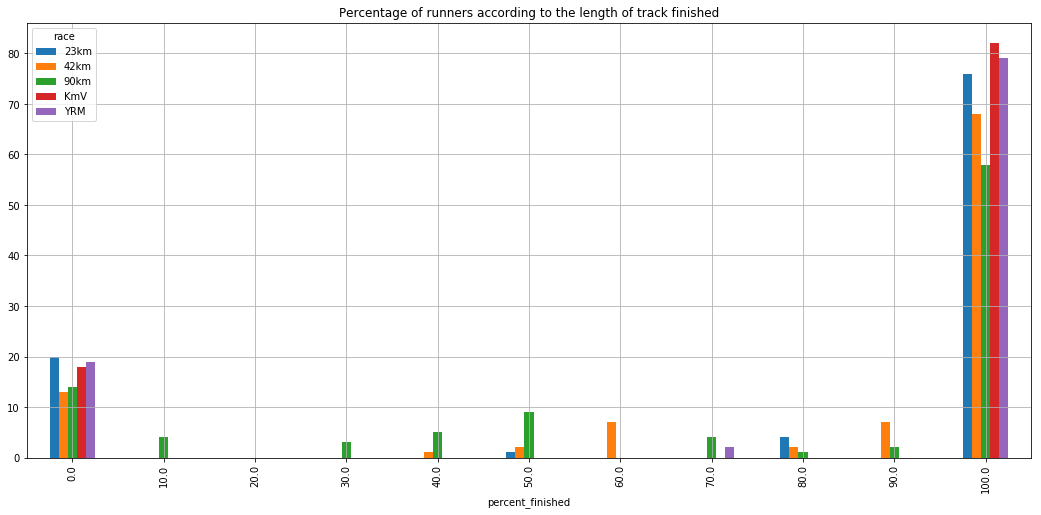

In [79]:
rcParams['figure.figsize'] = 18, 8
(heatmap / heatmap.sum() * 100).round().plot.bar(grid=True)
plt.title('Percentage of runners according to the length of track finished')

In [83]:
df['finished'] = df.num_stages == df.max_stages_for_race

In [89]:
df['time'] = [row['stages'][-1]['timeSeconds'] for _, row in df.iterrows()]

In [326]:
df.loc[df.surname == 'KADECKA']

,ageGroup,category,city,club,country,firstName,id,nationality,previous,race,sex,stages,surname,num_stages,max_stages_for_race,percent_finished,finished,time
5915,23-39,SE F,PRAGUE,M.R.C.I.N.A.,SVK,Zuzana,6270,Slovaquie,[],23km,F,"[{'km': 0, 'altitude': 1038, 'lat': 45.9282, '...",KADECKA,3,4,80.0,False,16369


In [319]:
def rolling_histogram(df, race = '23km', normalize=True):
    rcParams['figure.figsize'] = 18, 8

    gauss = (df.loc[df.finished & (df.race == race)].time / 60).round().value_counts().sort_index()
    values = pd.DataFrame([{ 'index': i, 'number': gauss[i] if i in gauss else 0} for i in range(int(gauss.index.min()), int(gauss.index.max() + 1))]).set_index('index').number

    if normalize:
        values = values / values.sum() * 100
    values = values.rolling(10).sum()
    values.index = values.index / 60
    
    return values

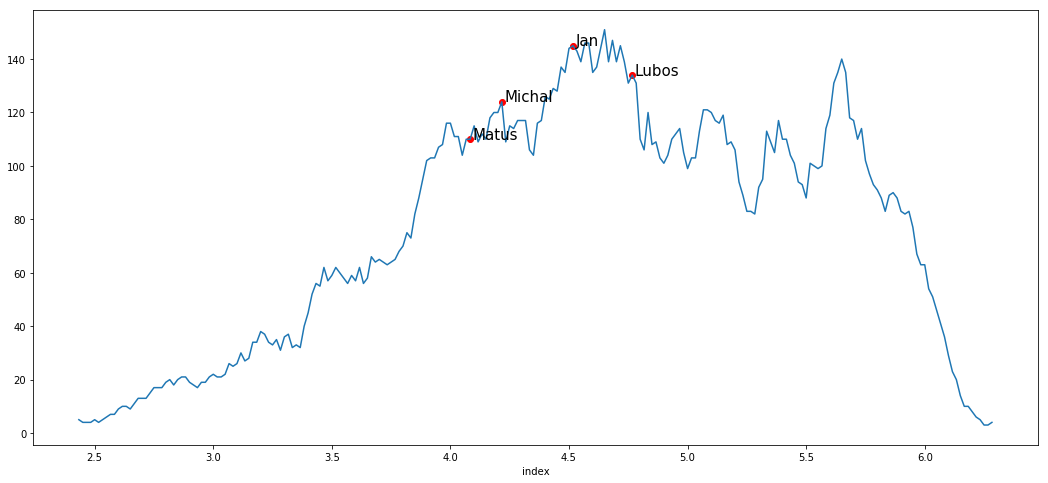

In [331]:
values = rolling_histogram(df, normalize=False)

for _, runner in df.loc[df.surname.isin(['TOMLEIN', 'DEMOVIC', 'SUKENIK'])].iterrows():
    x = round(runner.time / 60) / 60
    y = values[x]
    plt.plot(x, y,'ro')
    plt.annotate(runner.firstName, (x + 0.01, y + 0.1), size=15)

values.plot()

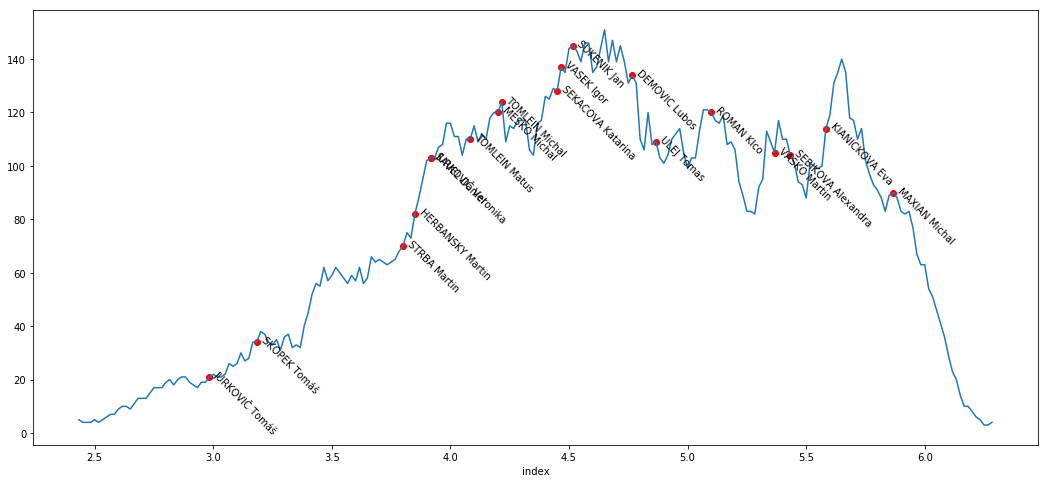

In [335]:
values = rolling_histogram(df, normalize=False)

for _, runner in df.loc[df.finished & (df.country == 'SVK')].iterrows():
    x = round(runner.time / 60) / 60
    if x in values:
        y = values[x]
        plt.plot(x, y,'ro')
        plt.annotate(runner.surname + ' ' + runner.firstName, (x + 0.01, y - 0.2), size=10, rotation=-45)

values.plot()

Text(0.5,1,'By gender')

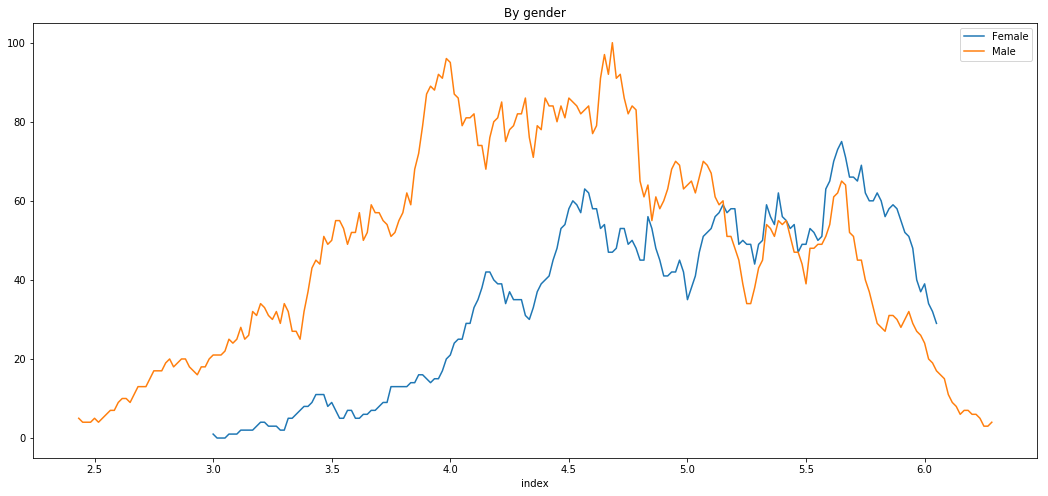

In [288]:
rolling_histogram(df.loc[df.sex == 'F'], normalize=False).plot(label='Female')
rolling_histogram(df.loc[df.sex == 'H'], normalize=False).plot(label='Male')
plt.legend()
plt.title('By gender')

Text(0.5,1,'By age')

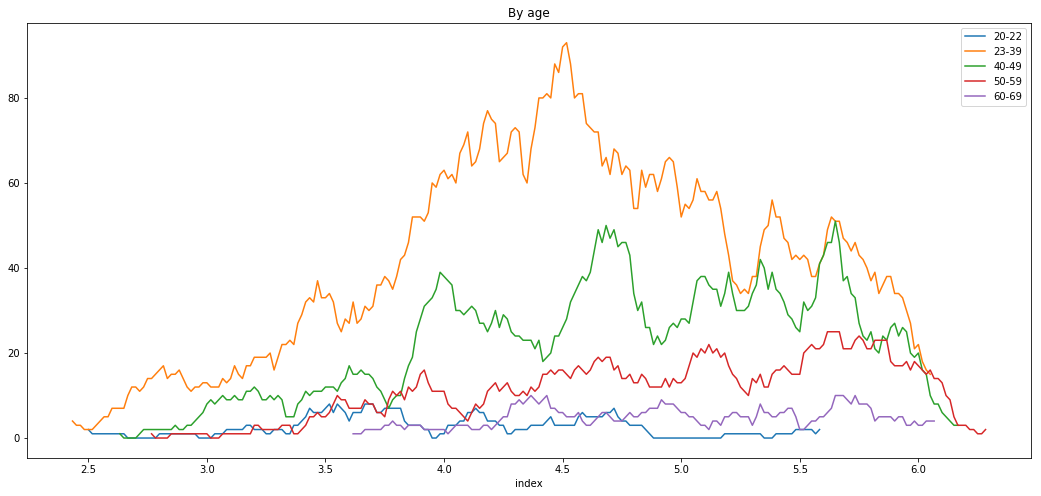

In [320]:
for group in df.ageGroup.sort_values().unique().tolist():
    if group != '':
        subdf = df.loc[df.ageGroup == group]
        if len(subdf) > 100:
            rolling_histogram(subdf, normalize=False).plot(label=group)
plt.legend()
plt.title('By age')

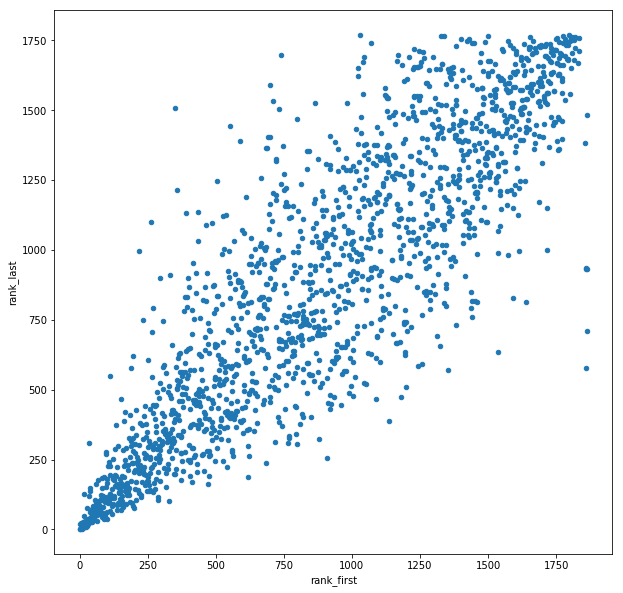

In [318]:
plt.rcParams['figure.figsize'] = 10, 10

ranked = df.loc[(df.finished) & (df.race == '23km')].copy()
ranked['rank_first'] = [row['stages'][1]['rank'] for _, row in ranked.iterrows()]
ranked['rank_last'] = [row['stages'][-1]['rank'] for _, row in ranked.iterrows()]
ranked.plot.scatter(x='rank_first', y='rank_last')

In [342]:
df.loc[(df.country == 'SVK') & (df.sex == 'F')][['firstName', 'surname', 'ageGroup', 'city', 'finished']]

,firstName,surname,ageGroup,city,finished
4026,Hana,HOZZANKOVA,23-39,BRATISLAVA,True
4054,Andrea,ELISCHEROVA,23-39,ZÁZRIVÁ,True
5885,Alexandra,SEBIKOVA,23-39,SPISSKA NOVA VES,True
5915,Zuzana,KADECKA,23-39,PRAGUE,False
5957,Veronika,JURKOVIČ,23-39,ZILINA,True
5959,Eva,KIANICKOVA,23-39,ZILINA,True
6046,Katarina,SEKACOVA,23-39,MARIANKA,True


In [340]:
df.columns

Index(['ageGroup', 'category', 'city', 'club', 'country', 'firstName', 'id',
       'nationality', 'previous', 'race', 'sex', 'stages', 'surname',
       'num_stages', 'max_stages_for_race', 'percent_finished', 'finished',
       'time'],
      dtype='object')